<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [64]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install matplotlib
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [10]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [13]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [17]:
Tesla = yf.Ticker('TSLA')


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
tesla_data = Tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [21]:
tesla_data.reset_index(inplace=True)


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [24]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

html_data = response.text  # Almacena el contenido de la respuesta

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
from bs4 import BeautifulSoup

# Analizar usando BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")  # O usa "html5lib"
table = soup.find("table")


In [27]:
# Crear un DataFrame vacío para almacenar los datos
tesla_revenue_data = []

# Iterar sobre las filas de la tabla
rows = table.find_all("tr")
for row in rows:
    columns = row.find_all("td")  # Encuentra las columnas en cada fila
    if columns:  # Verifica que haya columnas
        date = columns[0].text.strip()  # Columna 'Date'
        revenue = columns[1].text.strip()  # Columna 'Revenue'
        tesla_revenue_data.append([date, revenue])

# Crear el DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=["Date", "Revenue"])


In [46]:
# Limpiar la columna 'Revenue' (quitando '$' y ',')
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[\$,]", "", regex=True).astype(float)

# Eliminar filas nulas o inválidas
tesla_revenue.dropna(inplace=True)

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], yearfirst=True)  # Convertir a formato datetime

tesla_revenue = tesla_revenue.sort_values(by="Date")  # Ordenar por fecha

# Extraer sólo los años para el eje X
tesla_revenue["Year"] = tesla_revenue["Date"].dt.year  # Crear una nueva columna con sólo los años

# Vista previa del DataFrame
print(tesla_revenue.head())

         Date  Revenue  Year
12 2009-01-01    112.0  2009
11 2010-01-01    117.0  2010
10 2011-01-01    204.0  2011
9  2012-01-01    413.0  2012
8  2013-01-01   2013.0  2013


<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27512\295217639.py:2: SyntaxWarning:

invalid escape sequence '\$'



Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


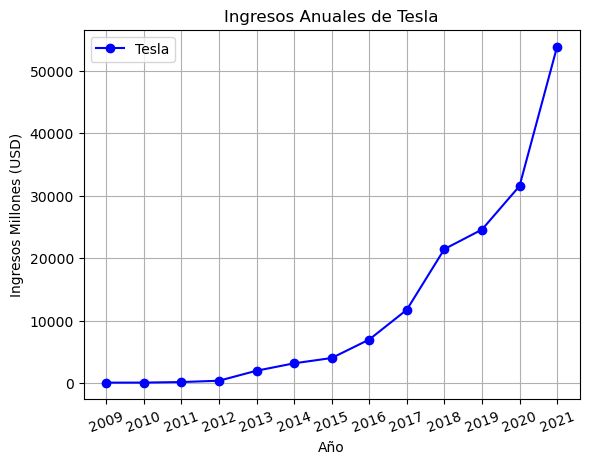

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficar los datos
plt.plot(tesla_revenue["Year"], tesla_revenue["Revenue"], marker='o', linestyle='-', color='blue', label='Tesla')

# Personalizar la gráfica
plt.xlabel("Año")  # Eje X muestra años
plt.ylabel("Ingresos Millones (USD)")  # Eje Y muestra ingresos
plt.title("Ingresos Anuales de Tesla")
plt.xticks(tesla_revenue["Year"].unique())  # Asegurarse de que sólo muestre los años únicos
plt.xticks(rotation=20)
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.show()

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [32]:
import yfinance as yf
import pandas as pd

# Crear un objeto Ticker para GME
gme = yf.Ticker("GME")

# Obtener datos históricos de los últimos 20 años
gme_history = gme.history(period="10y")  # '20y' indica 20 años de datos históricos

# Crear un DataFrame con los precios de apertura
gme_prices = gme_history[["Open"]]  # Seleccionar sólo la columna 'Open'

# Mostrar la tabla
print(gme_prices)

                                Open
Date                                
2015-04-06 00:00:00-04:00   7.135162
2015-04-07 00:00:00-04:00   7.204635
2015-04-08 00:00:00-04:00   7.097607
2015-04-09 00:00:00-04:00   7.277864
2015-04-10 00:00:00-04:00   7.544494
...                              ...
2025-03-31 00:00:00-04:00  21.400000
2025-04-01 00:00:00-04:00  22.760000
2025-04-02 00:00:00-04:00  22.490000
2025-04-03 00:00:00-04:00  21.600000
2025-04-04 00:00:00-04:00  21.420000

[2517 rows x 1 columns]


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


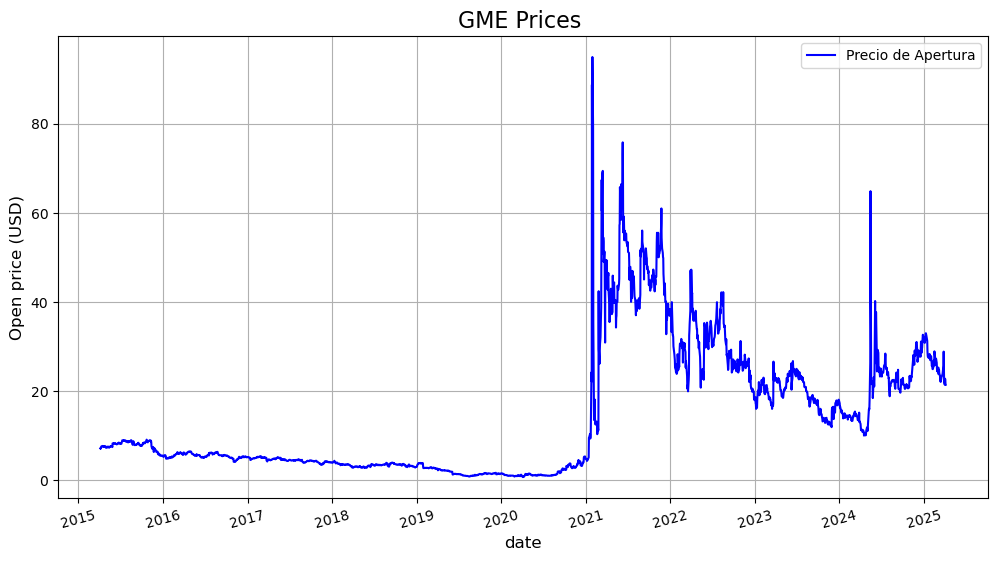

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Graficar los datos
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la gráfica
plt.plot(gme_prices.index, gme_prices["Open"], label="Precio de Apertura", color='blue')

# Personalizar la gráfica
plt.title("GME Prices ", fontsize=16)
plt.xlabel("date", fontsize=12)
plt.ylabel("Open price (USD)", fontsize=12)
plt.grid(True)  # Agregar cuadrícula
plt.legend()  # Mostrar la leyenda
plt.xticks(rotation=15)  # Rotar etiquetas del eje X para mejor visualización

# Mostrar la gráfica
plt.show()

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.
